In [1]:
import pandas as pd
import numpy as np
from src.signal_analyzer import SignalAnalyzer


### LOAD & PLOT

In [2]:
df = pd.read_csv('signals/Signal3_2018.csv', header=None)
signal = df.iloc[0].values


### Analyze of the analytical signal

In [3]:
analyzer = SignalAnalyzer()

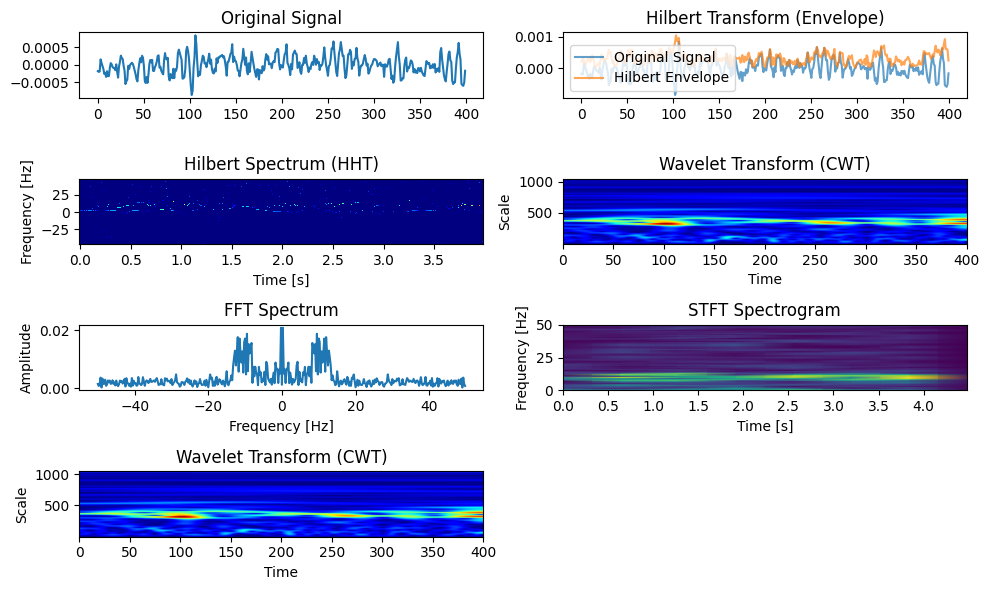

In [4]:
ht   = SignalAnalyzer.hilbert_transform(signal, fs=100.0, n_bins=256)
fft  = SignalAnalyzer.fft_transform(signal, fs=100.0)
stft = SignalAnalyzer.stft_transform(signal, fs=100.0, nperseg=128)
wvt  = SignalAnalyzer.wvt_transform(signal)
cwt   = SignalAnalyzer.wt_transform(signal,wavelet='morlet', fs=100.0)

results = [
    {"type": "Original"},ht,cwt,fft,stft,cwt
]


plot_analytical_signal = True
width = 10
height = 6
if plot_analytical_signal:
    analyzer.plot_all(signal, results, width, height)




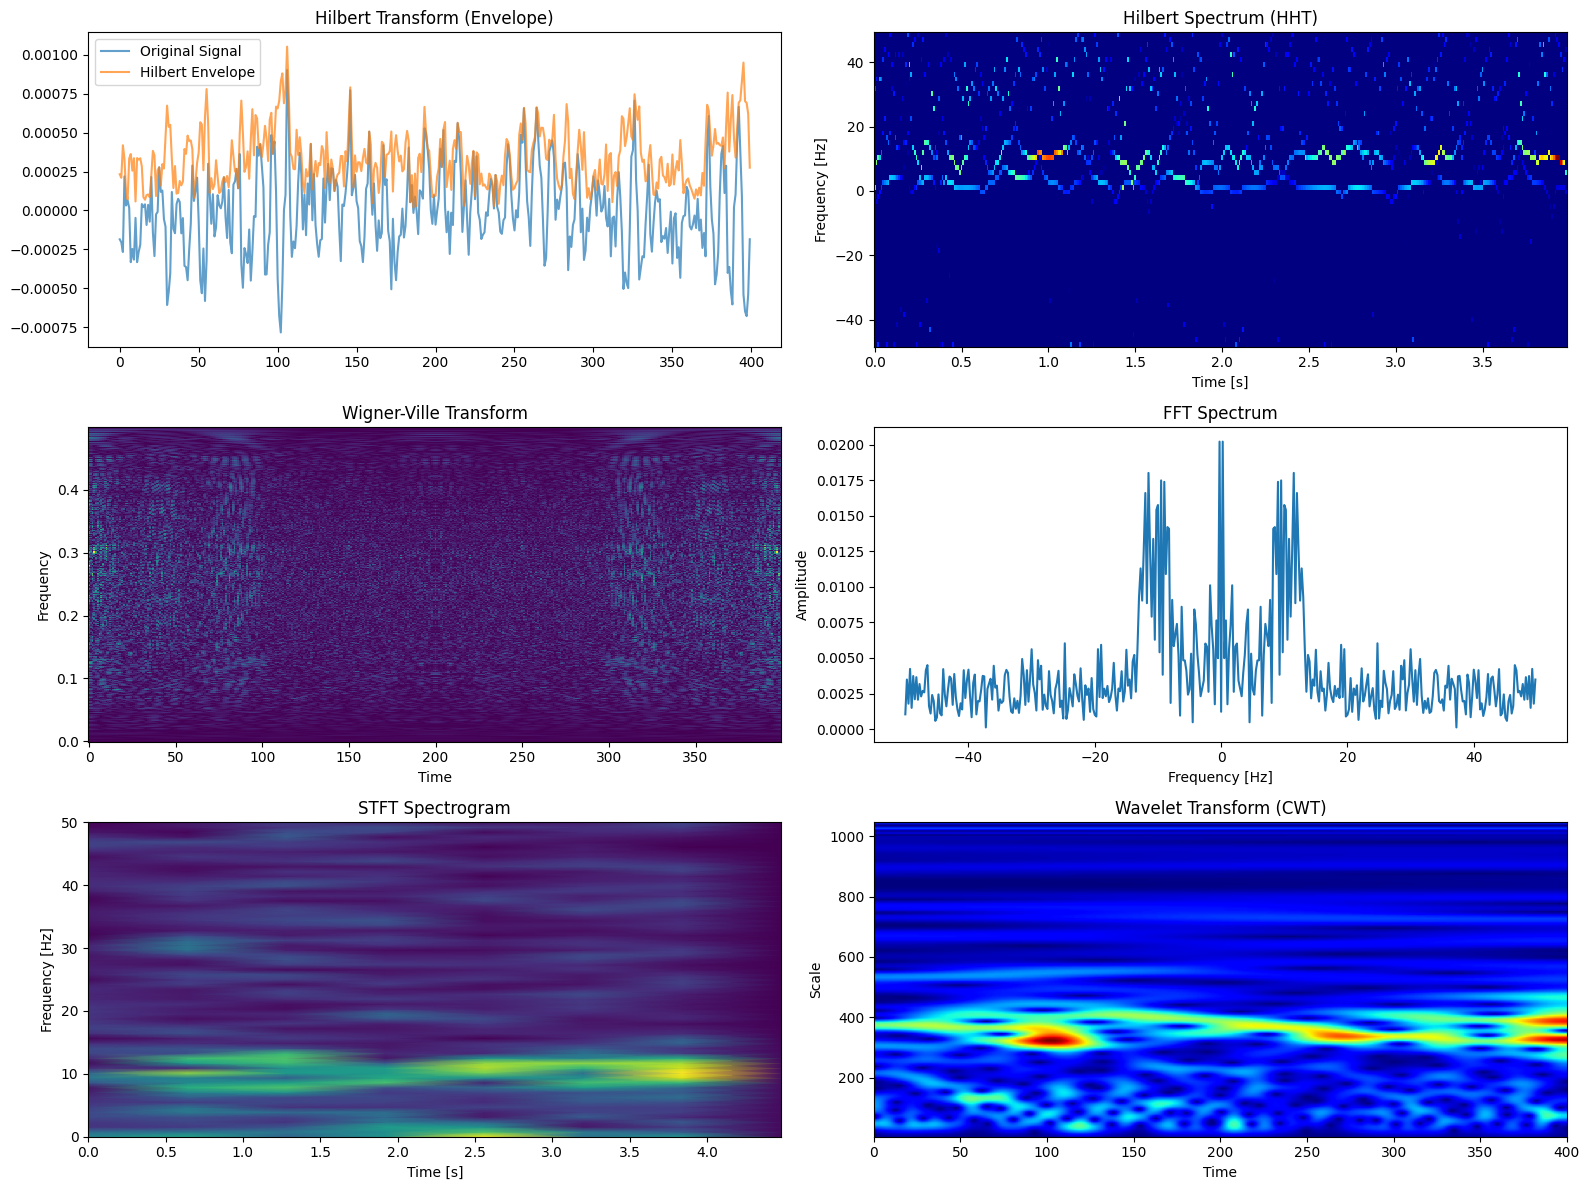

In [9]:
# Add white noise
noise = np.random.normal(0,signal.max()/10,len(signal))
noisy_signal = signal + noise

ht_noisy   = analyzer.hilbert_transform(noisy_signal, fs=100.0, n_bins=64)
wvt_noisy  = analyzer.wvt_transform(noisy_signal)
fft_noisy  = analyzer.fft_transform(noisy_signal, fs=100.0)
stft_noisy = analyzer.stft_transform(noisy_signal, fs=100.0, nperseg=128)
cwt_noisy  = analyzer.wt_transform(noisy_signal, wavelet='morlet', fs=100.0)
results_noisy = [
    ht_noisy,wvt_noisy,fft_noisy,stft_noisy,cwt_noisy
]
analyzer.plot_all(noisy_signal, results_noisy, width=16, height=12)


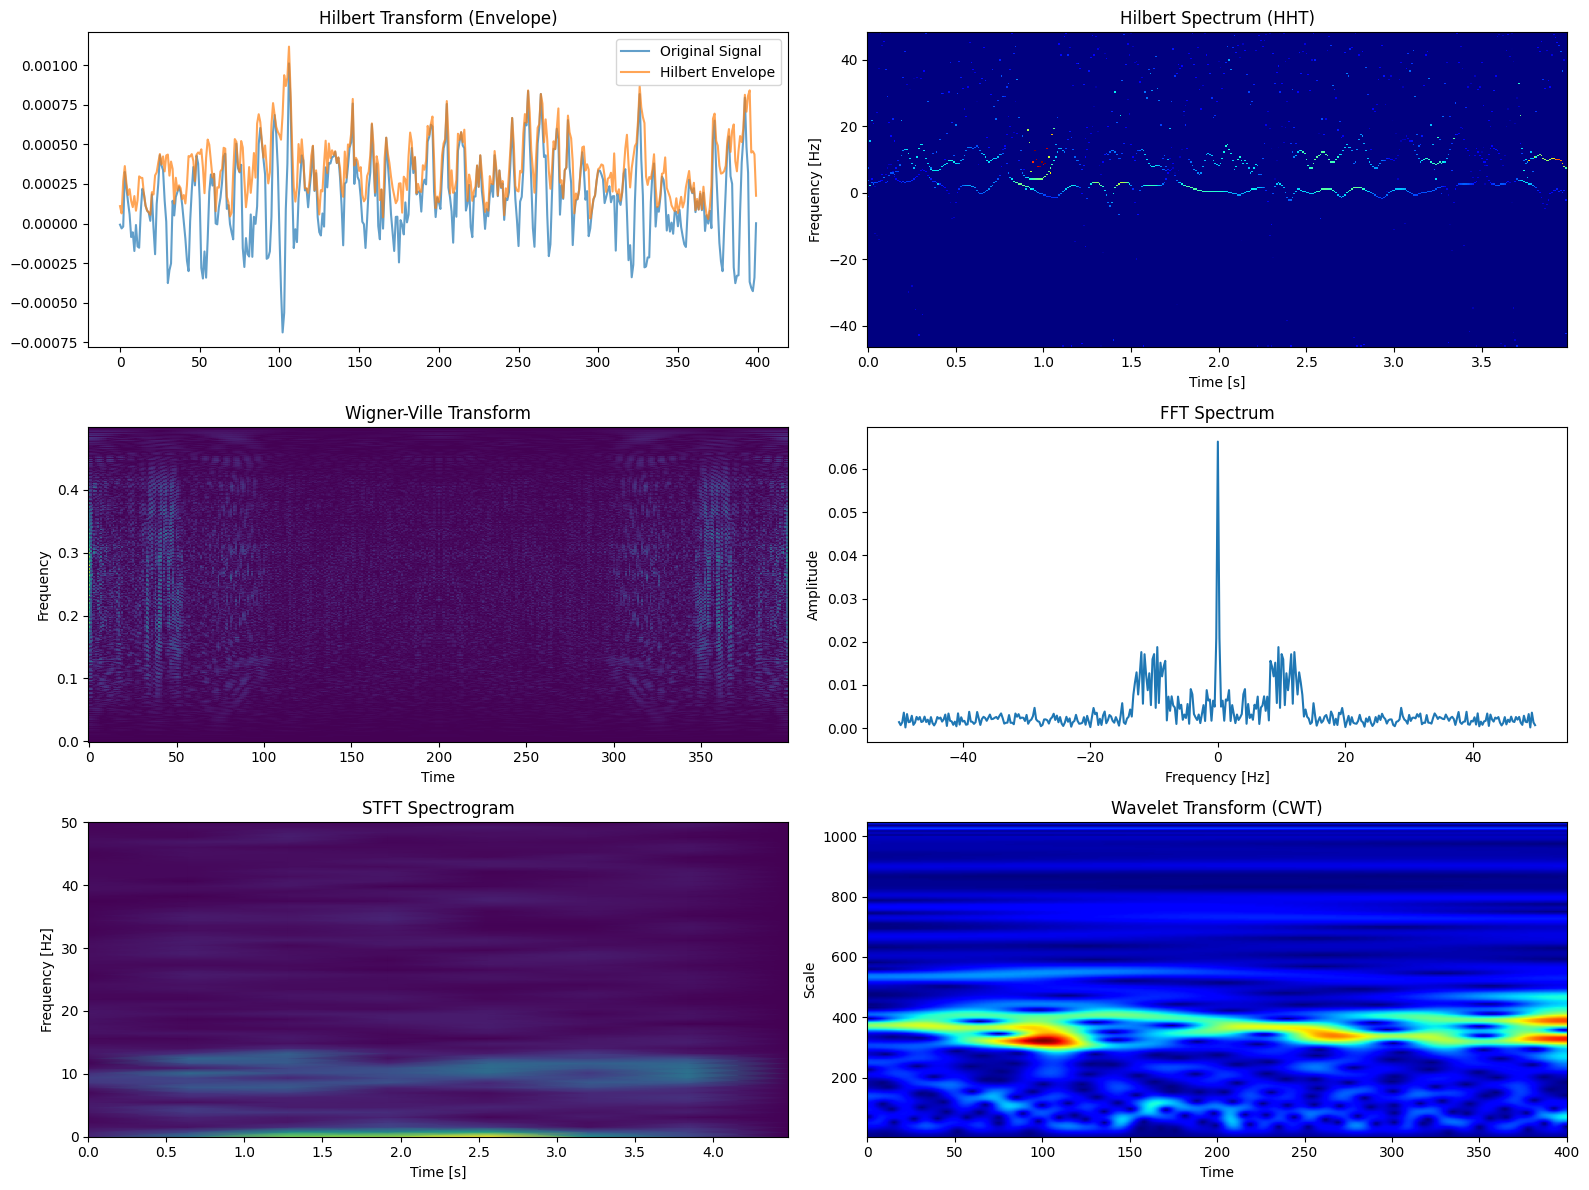

In [6]:
# add offset
offset_signal = signal.max()/5 + signal

ht_offset   = analyzer.hilbert_transform(offset_signal, fs=100.0, n_bins=256)
wvt_offset  = analyzer.wvt_transform(offset_signal)
fft_offset  = analyzer.fft_transform(offset_signal, fs=100.0)
stft_offset = analyzer.stft_transform(offset_signal, fs=100.0, nperseg=128)
cwt_offset  = analyzer.wt_transform(offset_signal, wavelet='morlet', fs=100.0)
results_offset = [
    ht_offset,wvt_offset,fft_offset,stft_offset,cwt_offset
]
analyzer.plot_all(offset_signal, results_offset, width=16, height=12)

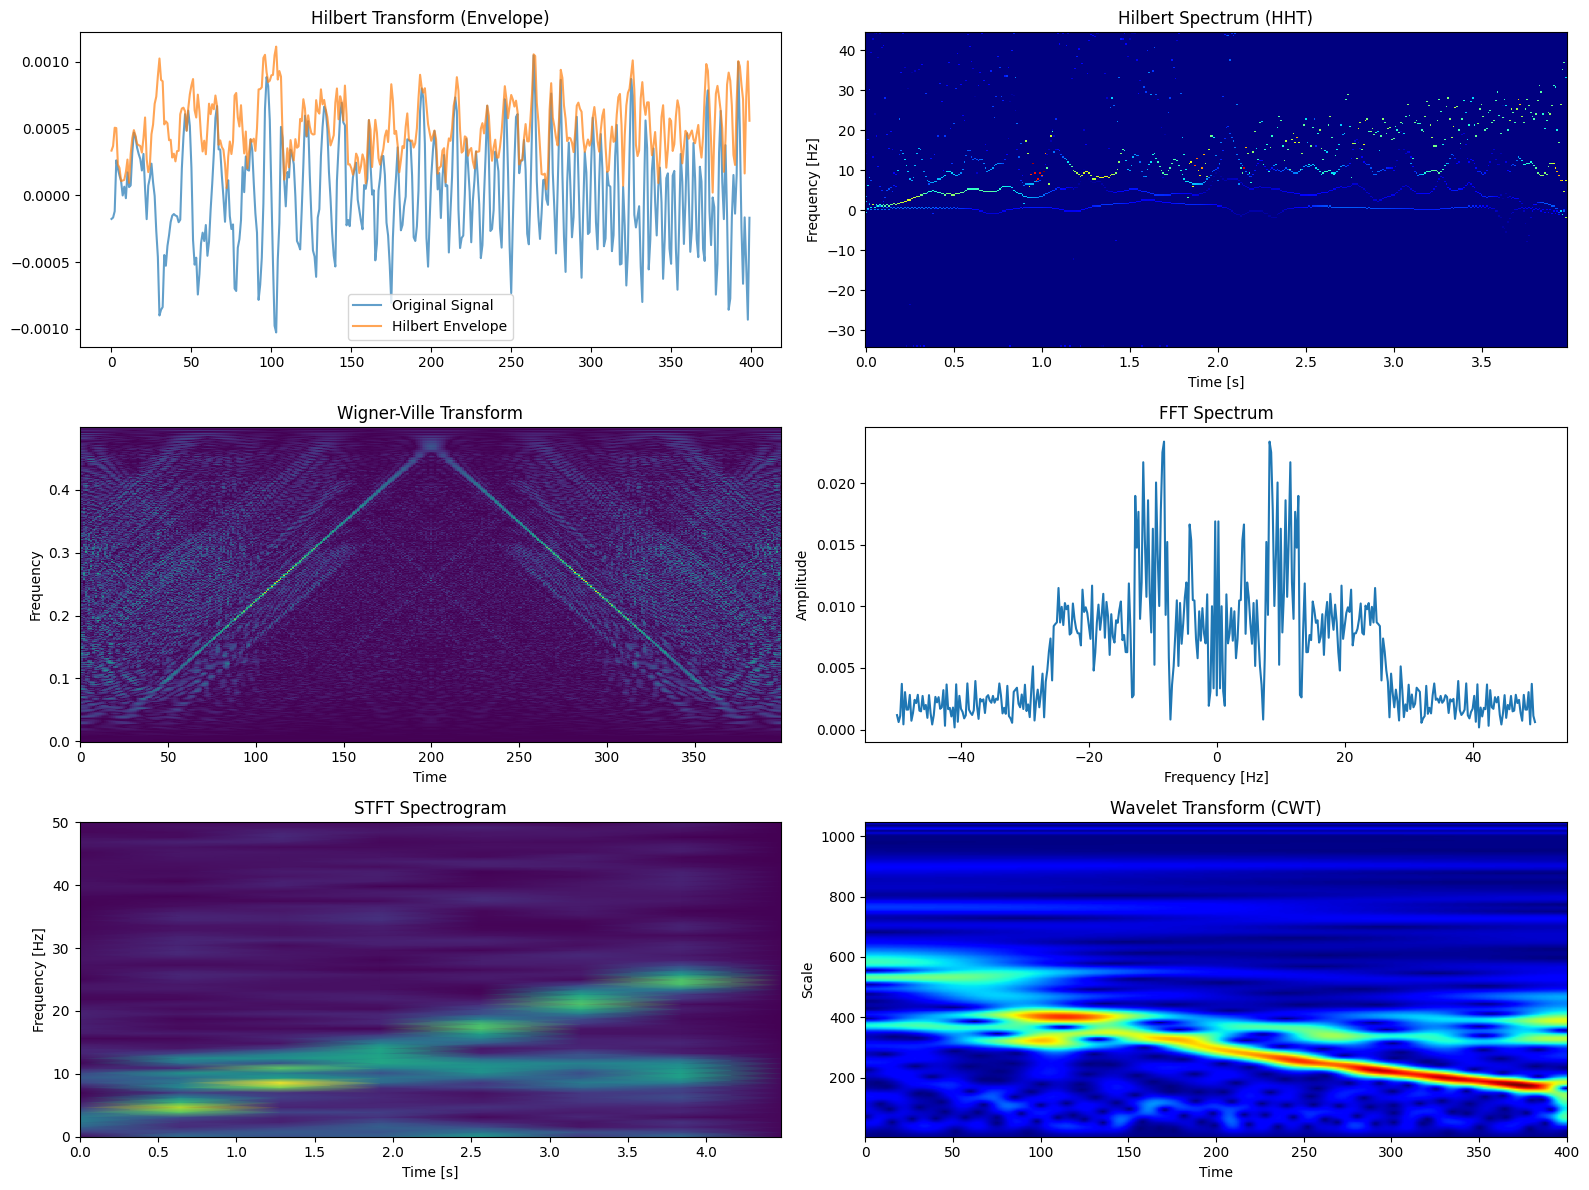

In [7]:
## Add a linearly time variying frquency component
n_chirp = len(signal)
t = np.linspace(0, 1, n_chirp)
k = 50 

amplitude = signal.max()
chirp = amplitude/2 * np.sin(2 * np.pi * (5 * t + k * t**2)) 

signal_kt = signal + chirp
ht_kt   = analyzer.hilbert_transform(signal_kt, fs=100.0, n_bins=256)
wvt_kt  = analyzer.wvt_transform(signal_kt)
fft_kt  = analyzer.fft_transform(signal_kt, fs=100.0)
stft_kt = analyzer.stft_transform(signal_kt, fs=100.0, nperseg=128)
cwt_kt  = analyzer.wt_transform(signal_kt, wavelet='morlet', fs=100.0)

results_kt = [
    ht_kt,wvt_kt,fft_kt,stft_kt,cwt_kt
]
analyzer.plot_all(signal_kt, results_kt, width=16, height=12)

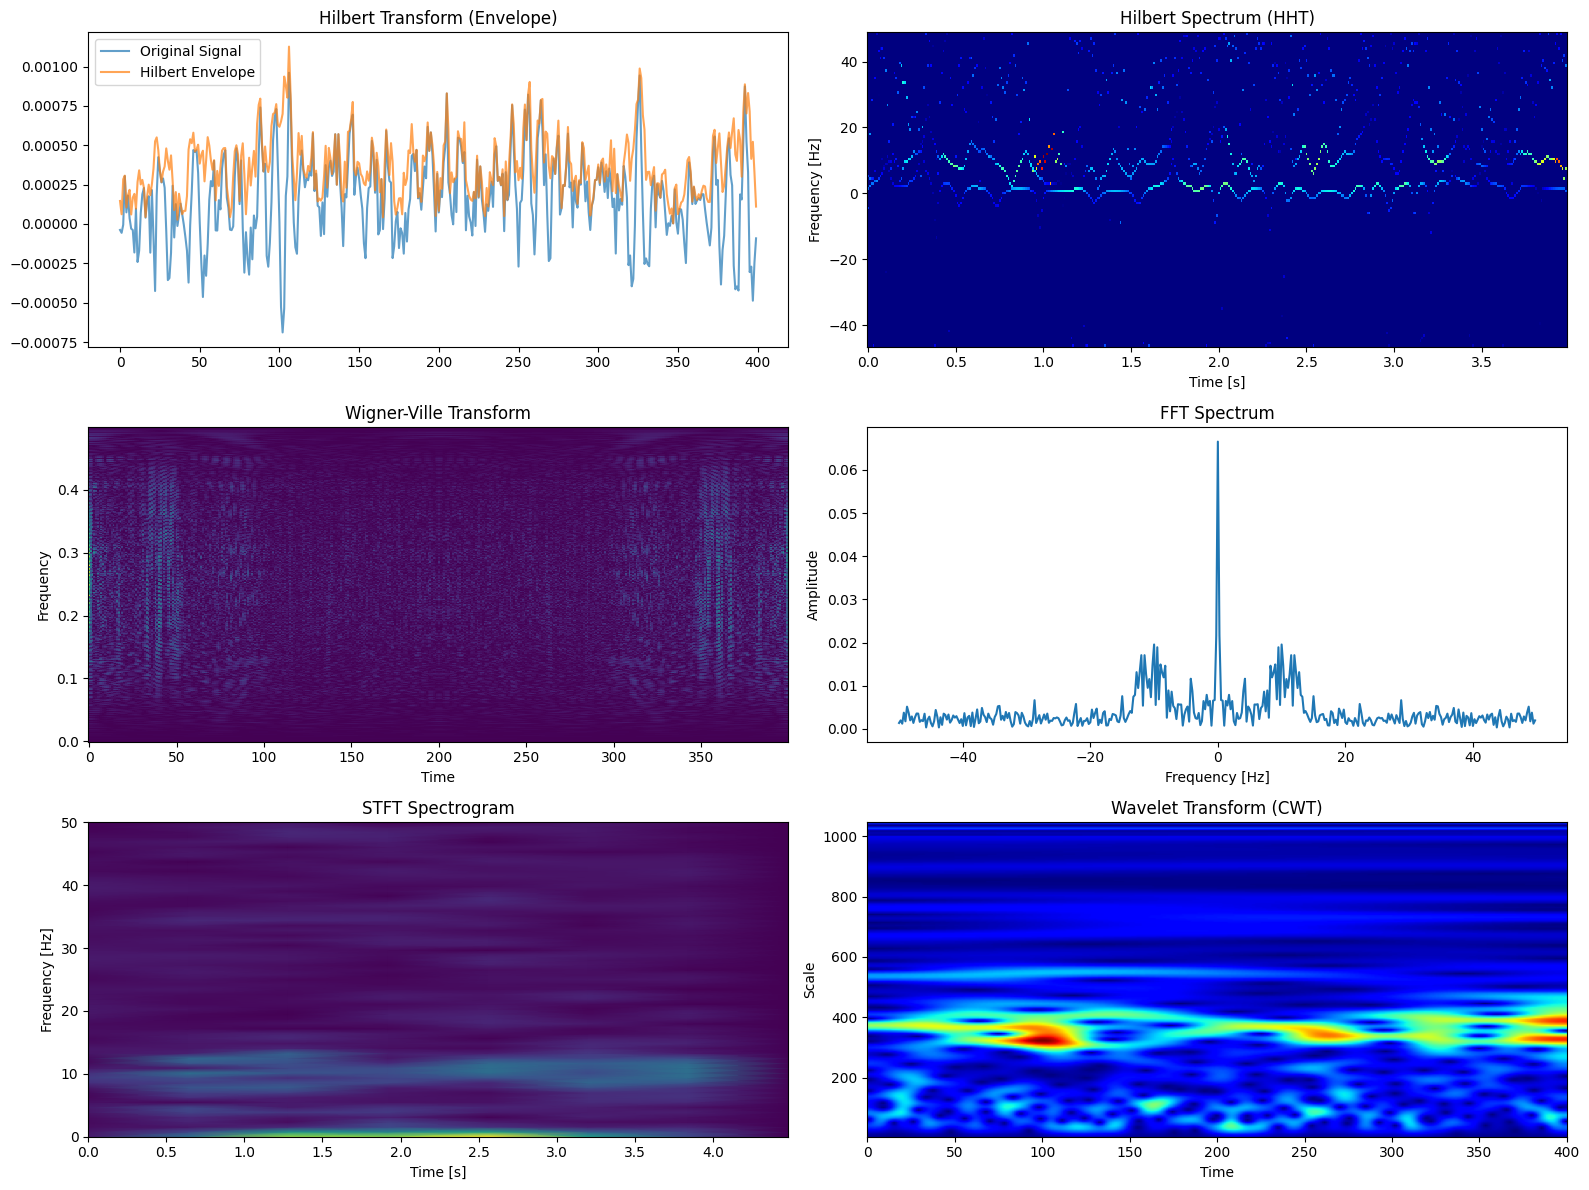

In [8]:
# offset + noise
noisy_offset_signal = offset_signal + noise
ht_noisy_offset   = analyzer.hilbert_transform(noisy_offset_signal, fs=100.0, n_bins=128)
wvt_noisy_offset  = analyzer.wvt_transform(noisy_offset_signal)
fft_noisy_offset  = analyzer.fft_transform(noisy_offset_signal, fs=100.0)
stft_noisy_offset = analyzer.stft_transform(noisy_offset_signal, fs=100.0, nperseg=128)
cwt_noisy_offset  = analyzer.wt_transform(noisy_offset_signal, wavelet='morlet', fs=100.0)
results_noisy_offset = [
    ht_noisy_offset,wvt_noisy_offset,fft_noisy_offset,stft_noisy_offset,cwt_noisy_offset
]
analyzer.plot_all(noisy_offset_signal, results_noisy_offset, width=16, height=12)